# Nearest neighbors and DTW

`tslearn` provides a `neighbors` package that offers Dynamic Time Warping (DTW) specific variants of algorithms proposed in `sklearn.neighbors`.
In this notebook, we present basic usage of this package.

Populating the interactive namespace from numpy and matplotlib


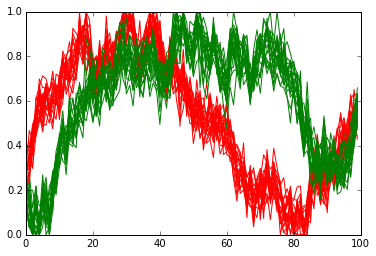

In [1]:
%pylab inline
import sys
sys.path.append("../../")  # Add tslearn base directory to Python path

from tslearn.generators import random_walk_blobs
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsDynamicTimeWarpingClassifier as kNN_DTW

numpy.random.seed(0)
n_ts_per_blob, sz, d, n_blobs = 20, 100, 1, 2
color_list=["r", "g"]
X, y = random_walk_blobs(n_ts_per_blob=n_ts_per_blob, sz=sz, d=d, n_blobs=n_blobs)
scaler = TimeSeriesScalerMinMax(min=0., max=1.)  # Rescale time series
X_scaled = scaler.fit_transform(X)

for i in range(n_ts_per_blob * n_blobs):
    pylab.plot(numpy.arange(sz), X_scaled[i, :, 0], color=color_list[y[i]]);

Now we can make use of `tslearn.neighbors` to perform k-nearest neighbor classification.

In [2]:
indices_shuffle = numpy.random.permutation(n_ts_per_blob * n_blobs)
X_shuffle = X_scaled[indices_shuffle]
y_shuffle = y[indices_shuffle]

X_train = X_shuffle[:n_ts_per_blob * n_blobs // n_blobs]
X_test = X_shuffle[n_ts_per_blob * n_blobs // n_blobs:]
y_train = y_shuffle[:n_ts_per_blob * n_blobs // n_blobs]
y_test = y_shuffle[n_ts_per_blob * n_blobs // n_blobs:]

knn = kNN_DTW(n_neighbors=3)
knn.fit(X_train, y_train)
predicted_labels = knn.predict(X_test)
print(numpy.sum(predicted_labels == y_test) / float(y_test.shape[0]))

1.0
